In [33]:
# Densidad de corriente
"""
Created on Fri Nov 19 10:10:47 2021

@author: Javier
"""

import numpy as np
import scipy.integrate
import scipy.special
import scipy

#%%
bobth=[3.015e-3, 5.46e-3, 2.94e-3, 900, 1.32e-3, 6.03e-3]

args=[1e3,bobth,16.5e6,1,5000]

bo=args[1]

#%%
def cquad(func, a, b, **kwargs):
    """ funcion auxiliar"""
    def real_func(x):
        return np.real(func(x))
    def imag_func(x):
        return np.imag(func(x))
    real_integral = scipy.integrate.quad(real_func, a, b, **kwargs)
    imag_integral = scipy.integrate.quad(imag_func, a, b, **kwargs)
    return (real_integral[0] + 1j*imag_integral[0])

#%%
def ji(k,r1,r2):
    """ funcion auxiliar"""
    return scipy.integrate.quad(lambda x: x*scipy.special.jv(1,x) ,k*r1,k*r2)[0]

#%%
def expz(k,z1,z2):
    """ funcion auxiliar"""
    return ((np.exp(-k*z1)-np.exp(-k*z2)))/(k**(3))

#%%
def sigj(k,sigma,f,mur,z):
    """ funcion auxiliar"""
    mu0 = 4*np.pi*1e-7
    k2=1j*2*np.pi*f*mu0*mur*sigma
    la=np.sqrt(k**2+k2)
    return (2*k*mur*np.exp(la*z)/(la+k*mur))

#%%
def jhf(r, z, I, args):
    """ Calculo de densidad corriente sobre una placa semi-infinita """

    f=args[0]
    bo=args[1]
    sigma=args[2]
    mur=args[3]
    lmax=args[4]
    # jhf=list()
    mu0=4*np.pi*1e-7;
    r1=bo[0];
    r2=bo[1];
    dh=bo[2];
    N=bo[3];
    z1=bo[4];
    l0=bo[5]
    i0=N*I/((r2-r1)*dh)
    aint=1j*2*np.pi*f*sigma*mu0*i0
    inte=cquad(lambda k: scipy.special.j1(k*r)*ji(k,r1,r2)*expz(k,z1,z1+dh)*sigj(k,sigma,f,mur,z),0,lmax)
    return(aint*inte)

In [5]:
#%%
ja = jhf(0.001,0.0,0.01,args)

np.real(ja)
np.imag(ja)

#%%
nr = 10
ra = [i*1e-3 for i in range(nr+1)]

nt = 5
ta = [((90/nt)*i) for i in range(nt+1)]
ta2 = [np.deg2rad((90/nt)*i) for i in range(nt+1)]

jra = [jhf(e, 0.0, 0.01, args) for e in ra]

rjra = [np.real(jhf(e, 0.0, 0.01, args)) for e in ra]

ijra = [np.imag(jhf(e, 0.0, 0.01, args)) for e in ra]

xa = np.arange(0, 0.011, 0.001)
xa2 = [i*1e-3 for i in range(nr+1)]

ya = np.arange(0, 0.011, 0.001)
ya2 = [i*1e-3 for i in range(nr+1)]

#%%
def puntos_grilla(nr, nt):
    ra = [i*1e-3 for i in range(nr)]
    ta2 = [np.deg2rad((90/nt)*i) for i in range(nt+1)]
    return ra, ta2

#%%
xy =np.array([[i*1e-3 for i in range(nr)], [i*1e-3 for i in range(nr)]])
x = [i*1e-3 for i in range(nr)]
y = [i*1e-3 for i in range(nr)]

#%%

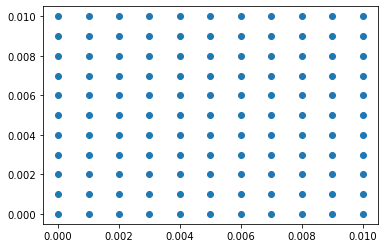

In [10]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 0.011, 0.001)
y = np.arange(0, 0.011, 0.001)

xmesh, ymesh = np.meshgrid(x, y) # xmesh y ymesh son dos matrices de len(x)*len(y)

plt.scatter(xmesh, ymesh) # Dibuja la malla donde va a graficar el vector

plt.show()

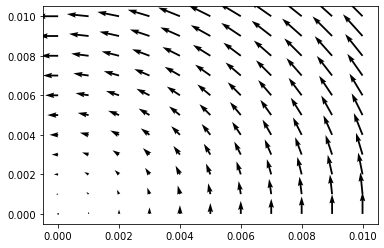

In [11]:
#%%

umesh = -ymesh
vmesh = xmesh

plt.quiver(xmesh, ymesh, umesh, vmesh) # quiver: quick vector
# umesh y vmesh son dos matrices de len(x)*len(y)

plt.show()

https://www.uobabylon.edu.iq/eprints/paper_11_24775_76.pdf

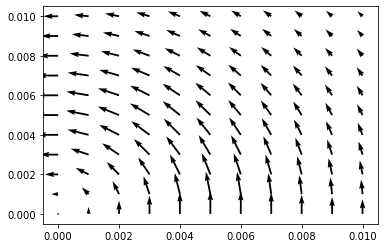

In [72]:
#%% Cálculo los vectores para graficar la dendidad de corriente en el primer
#   cuadrante

x = np.arange(0, 0.011, 0.001)
y = np.arange(0, 0.011, 0.001)
xmesh, ymesh = np.meshgrid(x, y) 

# Para graficar la corriente tengo que formar las matrices umesh y vmesh de 
# dimensión len(x)*len(y); que son las componentes de J

# uu, vv = np.meshgrid(np.sqrt(x**2+y**2), y**2) 

Jr = np.zeros([len(x), len(y)])
Jrx = np.zeros([len(x), len(y)])
Jry = np.zeros([len(x), len(y)])

for i,a in enumerate(x): # Son las filas de las matrices Jr, Jrx y Jry
    for j,b in enumerate(y): # Son la columnas de las matrices Jr, Jrx y Jry
        r = np.sqrt(a**2+b**2)
        
        
        # r,z,I, args
        jr = np.real(jhf(r,0.0,0.01,args))
        Jr[j,i] = jr
        
        if a != 0:
            jt = np.arctan(b/a)
        else:
            jt = np.pi / 2
        
        Jrx[j,i] = -jr * np.sin(jt)
        Jry[j,i] = jr * np.cos(jt)

#%% Grafica la dendidad de corriente en el primer cuadrante

plt.quiver(xmesh, ymesh, Jrx, Jry)       

plt.show()
    

In [69]:
#%% Prolongolos ejes

xv = np.arange(-0.01, 0.01, 0.0005)
yv = np.arange(-0.01, 0.01, 0.0005)

lx = len(xv)
ly = len(yv)

xs = np.zeros(lx)
ys = np.zeros(lx)



Jt = np.zeros([len(xv), len(yv)])

Jx = np.zeros([len(xv), len(yv)])
Jy = np.zeros([len(xv), len(yv)])

for i,x in enumerate(xv): # Son las filas de las matrices Jr, Jrx y Jry
    for j,y in enumerate(yv): # Son la columnas de las matrices Jr, Jrx y Jry
        
        r = np.sqrt(x**2+y**2)
        
        # r,z,I, args
        jt = np.real(jhf(r,0.0,0.01,args))
               
        Jt[i,j] = jt
        
        # if a != 0:
        #    jt = np.arctan(b/a)
        # else:
        #    jt = np.pi / 2
        
        t=np.arctan(y/x)
        
        Jx[i,j] = -np.sin(t)*jt
        Jy[i,j] = np.cos(t)*jt


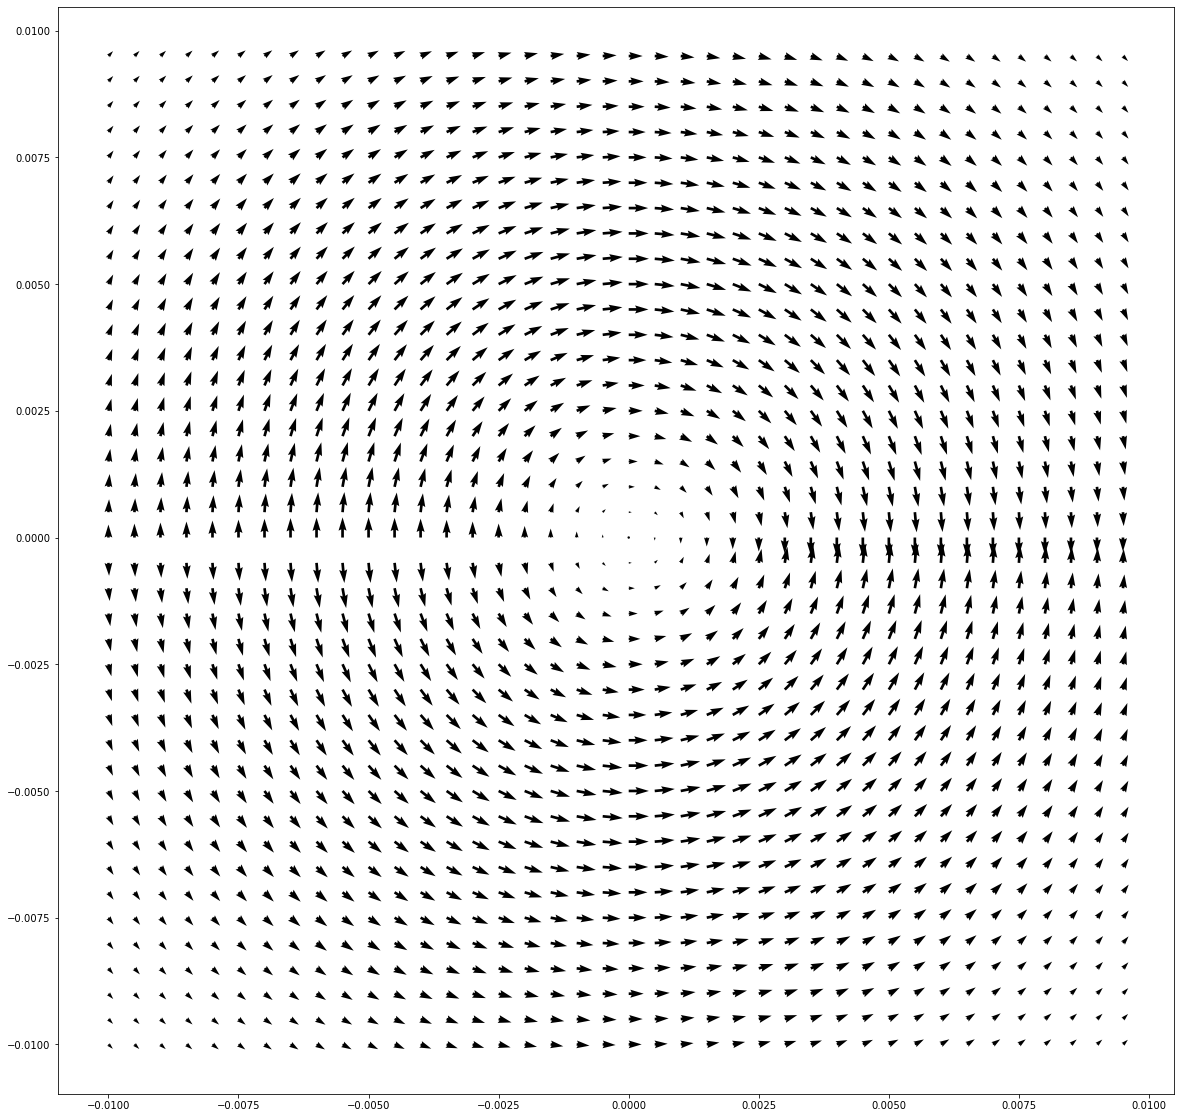

In [70]:
xmesh, ymesh = np.meshgrid(xv, yv) 

plt.figure(figsize=[20,20])

plt.quiver(xmesh, ymesh, Jy, Jx)       

plt.show()
    

In [35]:
#%% Prolongo por simetría los ejes



x = np.arange(0.0001, 0.011, 0.001)
y = np.arange(0.0001, 0.011, 0.001)

lx = len(x)
ly = len(y)

xs = np.zeros(2*lx-1)
ys = np.zeros(2*lx-1)




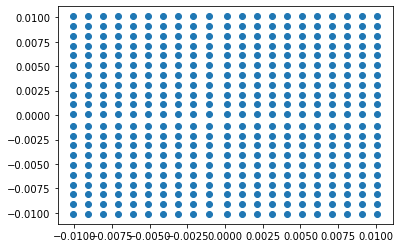

In [23]:
for i,a in enumerate(x):
    xs[i+lx-1] = x[i]
    if i > 0:
        xs[-i+lx-1] = -x[i]

for j,a in enumerate(y):
    ys[j+ly-1] = y[j]
    if j > 0:
        ys[-j+ly-1] = -y[j]

#%%
xmeshs, ymeshs = np.meshgrid(xs, ys) 

plt.scatter(xmeshs, ymeshs)
plt.show()

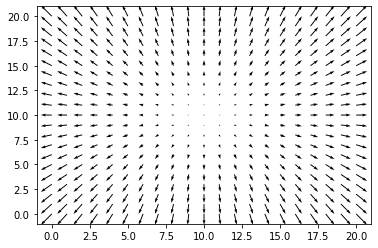

In [28]:


plt.quiver(xmeshs, ymeshs) # quiver: quick vector
# umesh y vmesh son dos matrices de len(x)*len(y)

plt.show()